# Social Media Ads Classifier using KNN

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

# check Null values

In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# check duplicate values

In [7]:
data.duplicated().sum()

0

In [8]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

0 shows adds not purchased and 1 shows adds purchased

# find correlation

<AxesSubplot:>

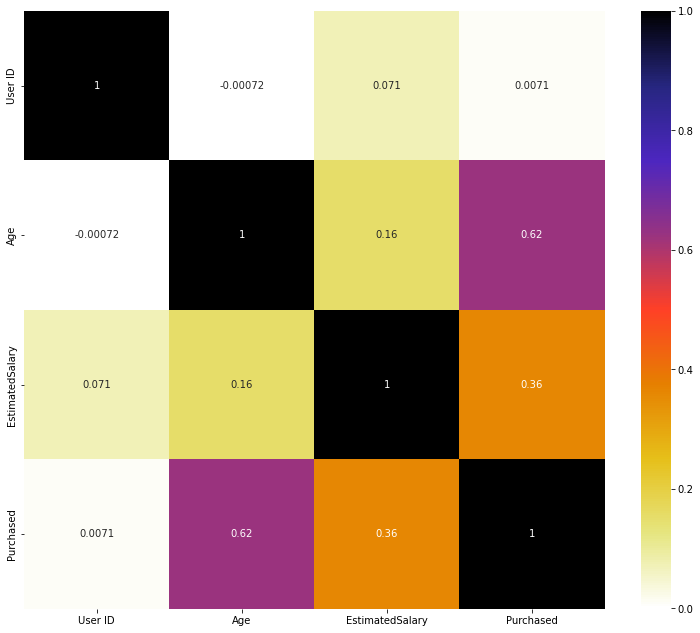

In [9]:
plt.figure(figsize=(13,11))
cor=data.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)

In [10]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
cleanup_nums = {'Gender':{"Male": 0, "Female": 1}}

In [12]:
data = data.replace(cleanup_nums)

In [13]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


# convert data into dependent and independent variables

In [14]:
X=data.drop(['Purchased'],axis=1)
y=data['Purchased']

# split the data into train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# apply standard scalar

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit the model

In [17]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# predict the value

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64

In [20]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

# compare predicted and actual values

In [21]:
comparison = pd.DataFrame({'Predicted Values':y_pred,'Actual Values':y_test})

In [22]:
comparison

,Predicted Values,Actual Values
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
216,1,0
259,1,1
49,0,0
238,0,0


# accuracy of model with k=5

In [23]:
ac = accuracy_score(y_test,y_pred)
ac

0.9083333333333333

# confusion matrix

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[74,  5],
       [ 6, 35]], dtype=int64)

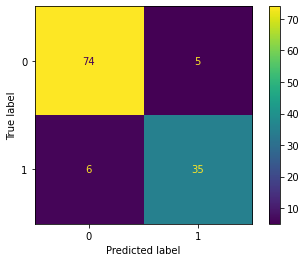

In [25]:
plot_confusion_matrix(classifier,X_test,y_test)